In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [155]:
df = pd.read_csv("C:/Users/dksat/Documents/GitHub/osiris/jw-combined-graph/live-birth.csv", thousands=",") #header=None, 
births_df = df.T
births_df.columns = births_df.iloc[0]
births_df = births_df[1:]
births_df["Quarter"] = births_df.index
births_df = births_df.iloc[::-1]
# no_of_rows = len(births_df.index)
# print(no_of_rows)
# only plot half of the data so i can see better
# births_df = births_df.iloc[0:int(no_of_rows)]
births_df.tail()

Data Series,Total Live-Births By Birth Order,Label,1st Live-Birth,2nd Live-Birth,3rd Live-Birth,4th Live-Birth,5th Live-Birth,6th Live-Birth & Over,Quarter
2020 2Q,9543,1,4499,3320,1186,359,101,78,2020 2Q
2020 3Q,9836,1,4762,3330,1174,381,116,73,2020 3Q
2020 4Q,9808,0,4722,3451,1133,323,117,62,2020 4Q
2021 1Q,8894,0,4097,3220,1093,326,98,60,2021 1Q
2021 2Q,9411,1,4298,3459,1140,339,112,63,2021 2Q


In [156]:
births_df[['year','quarter']] = births_df.Quarter.str.split(' ', expand=True)
births_df['quarter'] = births_df.quarter.str.replace('Q','')
births_df

Data Series,Total Live-Births By Birth Order,Label,1st Live-Birth,2nd Live-Birth,3rd Live-Birth,4th Live-Birth,5th Live-Birth,6th Live-Birth & Over,Quarter,year,quarter
1986 1Q,9954,0,4414,3553,1433,316,103,61,1986 1Q,1986,1
1986 2Q,9353,0,4186,3367,1271,332,87,50,1986 2Q,1986,2
1986 3Q,9854,1,4398,3475,1395,359,98,44,1986 3Q,1986,3
1986 4Q,10239,1,4782,3423,1454,351,98,51,1986 4Q,1986,4
1987 1Q,8834,0,4007,3053,1234,320,81,56,1987 1Q,1987,1
...,...,...,...,...,...,...,...,...,...,...,...
2020 2Q,9543,1,4499,3320,1186,359,101,78,2020 2Q,2020,2
2020 3Q,9836,1,4762,3330,1174,381,116,73,2020 3Q,2020,3
2020 4Q,9808,0,4722,3451,1133,323,117,62,2020 4Q,2020,4
2021 1Q,8894,0,4097,3220,1093,326,98,60,2021 1Q,2021,1


In [157]:
lc_across_industry = pd.read_csv("C:/Users/dksat/Documents/GitHub/osiris/unit-labour-cost-index-base-year-2015-100-quarterly/unit-labour-cost-index-base-year-2015-100-by-industry-quarterly.csv")
sector = lc_across_industry.columns[3]
sector_names = lc_across_industry[sector].unique()
lc_across_industry.tail()

,quarter,level_1,level_2,level_3,value
1733,2019-Q2,Unit Labour Cost Of Overall Economy,Unit Labour Cost Of Services Producing Industries,Unit Labour Cost Of Accommodation & Food Services,101.3
1734,2019-Q2,Unit Labour Cost Of Overall Economy,Unit Labour Cost Of Services Producing Industries,Unit Labour Cost Of Information & Communications,111.7
1735,2019-Q2,Unit Labour Cost Of Overall Economy,Unit Labour Cost Of Services Producing Industries,Unit Labour Cost Of Finance & Insurance,101.7
1736,2019-Q2,Unit Labour Cost Of Overall Economy,Unit Labour Cost Of Services Producing Industries,Unit Labour Cost Of Business Services,104.4
1737,2019-Q2,Unit Labour Cost Of Overall Economy,Unit Labour Cost Of Services Producing Industries,Unit Labour Cost Of Other Services Industries,98.2


In [158]:
lc_overall = pd.read_csv("C:/Users/dksat/Documents/GitHub/osiris/unit-labour-cost-index-base-year-2015-100-quarterly-sa/unit-labour-cost-index-base-year-2015-100-quarterly-sa.csv")
combined_lc = pd.concat([lc_across_industry, lc_overall])
combined_lc[sector].fillna(combined_lc[combined_lc.columns[1]], inplace=True)
sector_names = combined_lc[sector].unique()
df_lc = combined_lc.pivot_table(index="quarter", values= "value", columns = sector)
df_lc.reset_index(level=0, inplace=True)
df_lc

level_3,quarter,Unit Labour Cost Of Accommodation & Food Services,Unit Labour Cost Of Business Services,Unit Labour Cost Of Construction,Unit Labour Cost Of Finance & Insurance,Unit Labour Cost Of Information & Communications,Unit Labour Cost Of Manufacturing,Unit Labour Cost Of Other Goods Industries,Unit Labour Cost Of Other Services Industries,Unit Labour Cost Of Overall Economy,Unit Labour Cost Of Transportation & Storage,Unit Labour Cost Of Utilities,Unit Labour Cost Of Wholesale & Retail Trade
0,1980-Q1,19.3,27.7,55.0,44.3,98.8,88.4,33.8,39.4,54.2,62.4,71.9,73.9
1,1980-Q2,19.5,26.2,47.1,42.2,100.2,75.4,30.4,39.5,55.3,57.0,67.2,67.8
2,1980-Q3,20.2,27.8,51.5,42.9,105.6,78.4,31.7,41.5,56.1,57.7,71.9,67.8
3,1980-Q4,22.5,31.3,50.2,55.7,103.9,91.6,31.0,47.2,56.5,60.7,93.5,74.0
4,1981-Q1,25.1,32.5,64.8,40.5,110.6,95.3,36.6,42.6,58.6,63.1,72.7,87.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,2018-Q4,104.7,109.9,112.7,105.0,107.3,93.1,136.3,110.1,101.9,113.1,111.8,115.8
156,2019-Q1,111.1,112.3,114.6,100.9,114.6,94.4,140.6,119.3,102.3,113.6,126.0,123.1
157,2019-Q2,101.3,104.4,106.7,101.7,111.7,79.9,128.3,98.2,103.3,106.0,95.6,110.6
158,2019-Q3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.1,NaN,NaN,NaN


In [159]:
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.base import  datetools

df_lc[['year','quarter']] = df_lc.quarter.str.split('-', expand=True)
df_lc['quarter'] = df_lc.quarter.str.replace('Q','')
df_lc = df_lc.head(-2)
df_lc

level_3,quarter,Unit Labour Cost Of Accommodation & Food Services,Unit Labour Cost Of Business Services,Unit Labour Cost Of Construction,Unit Labour Cost Of Finance & Insurance,Unit Labour Cost Of Information & Communications,Unit Labour Cost Of Manufacturing,Unit Labour Cost Of Other Goods Industries,Unit Labour Cost Of Other Services Industries,Unit Labour Cost Of Overall Economy,Unit Labour Cost Of Transportation & Storage,Unit Labour Cost Of Utilities,Unit Labour Cost Of Wholesale & Retail Trade,year
0,1,19.3,27.7,55.0,44.3,98.8,88.4,33.8,39.4,54.2,62.4,71.9,73.9,1980
1,2,19.5,26.2,47.1,42.2,100.2,75.4,30.4,39.5,55.3,57.0,67.2,67.8,1980
2,3,20.2,27.8,51.5,42.9,105.6,78.4,31.7,41.5,56.1,57.7,71.9,67.8,1980
3,4,22.5,31.3,50.2,55.7,103.9,91.6,31.0,47.2,56.5,60.7,93.5,74.0,1980
4,1,25.1,32.5,64.8,40.5,110.6,95.3,36.6,42.6,58.6,63.1,72.7,87.3,1981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,2,97.9,101.1,109.2,105.7,106.6,75.7,123.8,96.7,100.1,104.4,95.8,102.9,2018
154,3,93.6,99.8,108.7,100.9,101.5,73.4,119.3,105.6,100.5,101.2,100.3,101.8,2018
155,4,104.7,109.9,112.7,105.0,107.3,93.1,136.3,110.1,101.9,113.1,111.8,115.8,2018
156,1,111.1,112.3,114.6,100.9,114.6,94.4,140.6,119.3,102.3,113.6,126.0,123.1,2019


In [160]:
final_df = pd.merge(df_lc, births_df,  how='left', left_on=['year','quarter'], right_on = ['year','quarter'])
final_df

,quarter,Unit Labour Cost Of Accommodation & Food Services,Unit Labour Cost Of Business Services,Unit Labour Cost Of Construction,Unit Labour Cost Of Finance & Insurance,Unit Labour Cost Of Information & Communications,Unit Labour Cost Of Manufacturing,Unit Labour Cost Of Other Goods Industries,Unit Labour Cost Of Other Services Industries,Unit Labour Cost Of Overall Economy,...,year,Total Live-Births By Birth Order,Label,1st Live-Birth,2nd Live-Birth,3rd Live-Birth,4th Live-Birth,5th Live-Birth,6th Live-Birth & Over,Quarter
0,1,19.3,27.7,55.0,44.3,98.8,88.4,33.8,39.4,54.2,...,1980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,19.5,26.2,47.1,42.2,100.2,75.4,30.4,39.5,55.3,...,1980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,20.2,27.8,51.5,42.9,105.6,78.4,31.7,41.5,56.1,...,1980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,22.5,31.3,50.2,55.7,103.9,91.6,31.0,47.2,56.5,...,1980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,25.1,32.5,64.8,40.5,110.6,95.3,36.6,42.6,58.6,...,1981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,2,97.9,101.1,109.2,105.7,106.6,75.7,123.8,96.7,100.1,...,2018,9427,0,4387,3338,1168,374,94,66,2018 2Q
154,3,93.6,99.8,108.7,100.9,101.5,73.4,119.3,105.6,100.5,...,2018,9841,1,4574,3532,1224,337,116,58,2018 3Q
155,4,104.7,109.9,112.7,105.0,107.3,93.1,136.3,110.1,101.9,...,2018,10173,1,4711,3670,1232,372,109,79,2018 4Q
156,1,111.1,112.3,114.6,100.9,114.6,94.4,140.6,119.3,102.3,...,2019,9402,0,4456,3316,1128,316,105,81,2019 1Q


In [161]:
quarterly = final_df["year"] + "Q" + final_df["quarter"]
quarterly = datetools.dates_from_str(quarterly)
quarterly

[datetime.datetime(1980, 3, 31, 0, 0),
 datetime.datetime(1980, 6, 30, 0, 0),
 datetime.datetime(1980, 9, 30, 0, 0),
 datetime.datetime(1980, 12, 31, 0, 0),
 datetime.datetime(1981, 3, 31, 0, 0),
 datetime.datetime(1981, 6, 30, 0, 0),
 datetime.datetime(1981, 9, 30, 0, 0),
 datetime.datetime(1981, 12, 31, 0, 0),
 datetime.datetime(1982, 3, 31, 0, 0),
 datetime.datetime(1982, 6, 30, 0, 0),
 datetime.datetime(1982, 9, 30, 0, 0),
 datetime.datetime(1982, 12, 31, 0, 0),
 datetime.datetime(1983, 3, 31, 0, 0),
 datetime.datetime(1983, 6, 30, 0, 0),
 datetime.datetime(1983, 9, 30, 0, 0),
 datetime.datetime(1983, 12, 31, 0, 0),
 datetime.datetime(1984, 3, 31, 0, 0),
 datetime.datetime(1984, 6, 30, 0, 0),
 datetime.datetime(1984, 9, 30, 0, 0),
 datetime.datetime(1984, 12, 31, 0, 0),
 datetime.datetime(1985, 3, 31, 0, 0),
 datetime.datetime(1985, 6, 30, 0, 0),
 datetime.datetime(1985, 9, 30, 0, 0),
 datetime.datetime(1985, 12, 31, 0, 0),
 datetime.datetime(1986, 3, 31, 0, 0),
 datetime.datetime(

<AxesSubplot:>

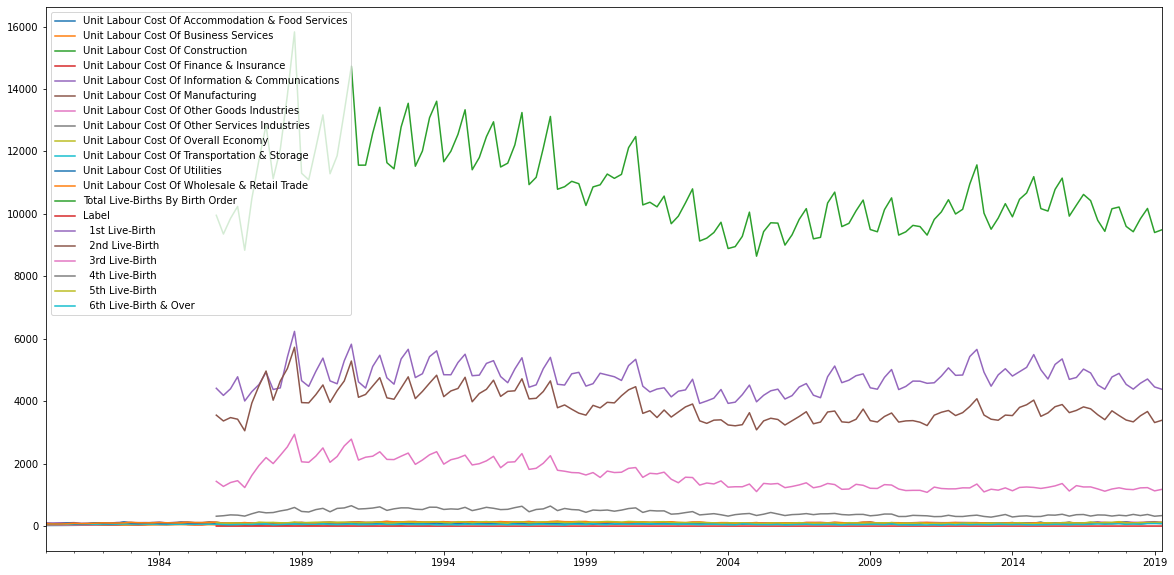

In [162]:
final_df.index = pd.DatetimeIndex(quarterly)
final_df.plot(figsize=(20,10))

In [163]:
final_df= final_df.drop('year',1)
final_df = final_df.drop('quarter',1)
final_df = final_df.drop('Quarter',1)
final_df = final_df.drop('Label',1)
final_df

C:\Users\dksat\AppData\Local\Temp/ipykernel_10160/2435710541.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  final_df= final_df.drop('year',1)
C:\Users\dksat\AppData\Local\Temp/ipykernel_10160/2435710541.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  final_df = final_df.drop('quarter',1)
C:\Users\dksat\AppData\Local\Temp/ipykernel_10160/2435710541.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  final_df = final_df.drop('Quarter',1)
C:\Users\dksat\AppData\Local\Temp/ipykernel_10160/2435710541.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  final_df = final_df.drop('Label',1)


,Unit Labour Cost Of Accommodation & Food Services,Unit Labour Cost Of Business Services,Unit Labour Cost Of Construction,Unit Labour Cost Of Finance & Insurance,Unit Labour Cost Of Information & Communications,Unit Labour Cost Of Manufacturing,Unit Labour Cost Of Other Goods Industries,Unit Labour Cost Of Other Services Industries,Unit Labour Cost Of Overall Economy,Unit Labour Cost Of Transportation & Storage,Unit Labour Cost Of Utilities,Unit Labour Cost Of Wholesale & Retail Trade,Total Live-Births By Birth Order,1st Live-Birth,2nd Live-Birth,3rd Live-Birth,4th Live-Birth,5th Live-Birth,6th Live-Birth & Over
1980-03-31,19.3,27.7,55.0,44.3,98.8,88.4,33.8,39.4,54.2,62.4,71.9,73.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-06-30,19.5,26.2,47.1,42.2,100.2,75.4,30.4,39.5,55.3,57.0,67.2,67.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-09-30,20.2,27.8,51.5,42.9,105.6,78.4,31.7,41.5,56.1,57.7,71.9,67.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-12-31,22.5,31.3,50.2,55.7,103.9,91.6,31.0,47.2,56.5,60.7,93.5,74.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981-03-31,25.1,32.5,64.8,40.5,110.6,95.3,36.6,42.6,58.6,63.1,72.7,87.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-30,97.9,101.1,109.2,105.7,106.6,75.7,123.8,96.7,100.1,104.4,95.8,102.9,9427,4387,3338,1168,374,94,66
2018-09-30,93.6,99.8,108.7,100.9,101.5,73.4,119.3,105.6,100.5,101.2,100.3,101.8,9841,4574,3532,1224,337,116,58
2018-12-31,104.7,109.9,112.7,105.0,107.3,93.1,136.3,110.1,101.9,113.1,111.8,115.8,10173,4711,3670,1232,372,109,79
2019-03-31,111.1,112.3,114.6,100.9,114.6,94.4,140.6,119.3,102.3,113.6,126.0,123.1,9402,4456,3316,1128,316,105,81


In [164]:
num = 4
df_train, df_test = final_df[0:-4], final_df[-4:]

In [165]:
#granger’s causality test
from statsmodels.tsa.stattools import grangercausalitytests
datatest = final_df.pct_change().dropna()
#Performing test on for labour uni and birth rate.
#gc_res = grangercausalitytests(datatest, 12)

In [166]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(data, variables = data.columns) 

C:\Python39\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Python39\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Python39\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 5, but rank is 3
  warnings.warn('covariance of constraints does not have full '
C:\Python39\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 6, but rank is 4
  warnings.warn('covariance of constraints does not have full '
C:\Python39\lib\site-packages\statsmodels\base\model

,Unit Labour Cost Of Accommodation & Food Services_x,Unit Labour Cost Of Business Services_x,Unit Labour Cost Of Construction_x,Unit Labour Cost Of Finance & Insurance_x,Unit Labour Cost Of Information & Communications_x,Unit Labour Cost Of Manufacturing_x,Unit Labour Cost Of Other Goods Industries_x,Unit Labour Cost Of Other Services Industries_x,Unit Labour Cost Of Transportation & Storage_x,Unit Labour Cost Of Utilities_x,Unit Labour Cost Of Wholesale & Retail Trade_x,Total Live-Births By Birth Order_x,1st Live-Birth_x,2nd Live-Birth_x,3rd Live-Birth_x,4th Live-Birth_x
Unit Labour Cost Of Accommodation & Food Services_y,1.0000,0.0372,0.5182,0.0000,0.1305,0.8850,0.0003,0.7595,0.5910,0.6885,0.0000,0.3986,0.2218,0.0001,0.0000,0.3356
Unit Labour Cost Of Business Services_y,0.0665,1.0000,0.0116,0.2092,0.4198,0.0000,0.3500,0.0439,0.1115,0.0000,0.0930,0.0001,0.1155,0.4698,0.0768,0.0008
Unit Labour Cost Of Construction_y,0.0000,0.0000,1.0000,0.6472,0.0000,0.0672,0.0070,0.3159,0.9136,0.3350,0.0481,0.7470,0.0008,0.7565,0.6721,0.6439
Unit Labour Cost Of Finance & Insurance_y,0.7885,0.3909,0.0048,1.0000,0.9003,0.3905,0.0003,0.0446,0.0000,0.7650,0.2684,0.0632,0.4651,0.0000,0.0000,0.1924
Unit Labour Cost Of Information & Communications_y,0.8794,0.0132,0.6596,0.0005,0.9934,0.0001,0.8404,0.7535,0.0001,0.9603,0.9978,0.8630,0.0005,0.9735,0.9688,0.0000
Unit Labour Cost Of Manufacturing_y,0.0000,0.0046,0.0004,0.1040,0.1907,1.0000,0.7171,0.0797,0.5271,0.5753,0.0000,0.1653,0.0000,0.9184,0.3666,0.0000
Unit Labour Cost Of Other Goods Industries_y,0.7927,0.0088,0.4620,0.7994,0.7750,0.0001,1.0000,0.0096,0.0755,0.0034,0.5288,0.0000,0.0001,0.7183,0.0927,0.7063
Unit Labour Cost Of Other Services Industries_y,0.0000,0.2932,0.0000,0.3204,0.0000,0.0718,0.2380,1.0000,0.2998,0.0000,0.9181,0.0011,0.0348,0.5015,0.8978,0.0039
Unit Labour Cost Of Transportation & Storage_y,0.6786,0.2161,0.5304,0.0599,0.0002,0.3376,0.1919,0.0019,1.0000,0.2947,0.8238,0.0015,0.2732,0.0090,0.0003,0.2683
Unit Labour Cost Of Utilities_y,0.0000,0.2781,0.0893,0.7867,0.0274,0.0000,0.2105,0.8566,0.7004,1.0000,0.0000,0.6871,0.0442,0.9741,0.8563,0.0293


In [167]:
#first adf test
df_train = df_train.diff().dropna()

In [168]:
from statsmodels.tsa.stattools import adfuller
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")  

In [169]:
for name, column in df_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Unit Labour Cost Of Accommodation & Food Services" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.5037
 No. Lags Chosen       = 10
 Critical value 1%     = -3.487
 Critical value 5%     = -2.886
 Critical value 10%    = -2.58
 => P-Value = 0.0002. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Unit Labour Cost Of Business Services" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.782
 No. Lags Chosen       = 3
 Critical value 1%     = -3.484
 Critical value 5%     = -2.885
 Critical value 10%    = -2.579
 => P-Value = 0.0001. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Unit Labour Cost Of Construction" 
    ---------------------

In [170]:
#second adf test
df_train = df_train.diff().dropna()

In [171]:
# ADF Test on each column of 2nd Differences Dataframe
for name, column in df_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Unit Labour Cost Of Accommodation & Food Services" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.5333
 No. Lags Chosen       = 8
 Critical value 1%     = -3.487
 Critical value 5%     = -2.886
 Critical value 10%    = -2.58
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Unit Labour Cost Of Business Services" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -7.1848
 No. Lags Chosen       = 6
 Critical value 1%     = -3.486
 Critical value 5%     = -2.886
 Critical value 10%    = -2.58
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Unit Labour Cost Of Construction" 
    ----------------------------

In [172]:
#all datasets are now stationary
df_train

,Unit Labour Cost Of Accommodation & Food Services,Unit Labour Cost Of Business Services,Unit Labour Cost Of Construction,Unit Labour Cost Of Finance & Insurance,Unit Labour Cost Of Information & Communications,Unit Labour Cost Of Manufacturing,Unit Labour Cost Of Other Goods Industries,Unit Labour Cost Of Other Services Industries,Unit Labour Cost Of Overall Economy,Unit Labour Cost Of Transportation & Storage,Unit Labour Cost Of Utilities,Unit Labour Cost Of Wholesale & Retail Trade,Total Live-Births By Birth Order,1st Live-Birth,2nd Live-Birth,3rd Live-Birth,4th Live-Birth,5th Live-Birth,6th Live-Birth & Over
1986-09-30,1.9,1.1,20.7,9.4,-0.1,28.9,8.2,3.0,4.1,8.2,12.0,27.1,1102,440,294,286,11,27,5
1986-12-31,3.5,-1.6,-5.7,14.5,6.2,16.1,6.3,11.0,-0.5,5.2,23.2,3.4,-116,172,-160,-65,-35,-11,13
1987-03-31,-2.2,-1.7,1.5,-32.2,-13.2,-14.6,-0.8,-23.2,0.7,-2.3,-42.4,12.9,-1790,-1159,-318,-279,-23,-17,-2
1987-06-30,-1.4,6.3,-15.6,12.3,3.9,-11.6,-7.8,14.5,2.1,-3.6,16.5,-38.0,3059,1074,1259,609,106,18,-10
1987-09-30,-2.3,-4.3,8.0,2.2,-4.8,12.5,-0.6,-2.4,-4.7,-4.0,0.3,19.1,-418,-73,-339,-72,-12,43,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-30,-10.9,-11.5,-11.4,-7.0,-5.6,-17.5,-33.5,-36.8,0.2,-5.0,-34.5,-23.4,278,246,32,-8,-39,62,-15
2017-09-30,3.6,10.0,9.6,-1.3,-3.2,7.7,-1.9,31.2,-1.9,6.9,21.1,12.9,1076,530,442,144,-27,-29,16
2017-12-31,15.4,10.5,3.9,8.1,11.8,27.7,30.3,-4.7,1.6,12.2,12.5,11.0,-667,-276,-436,-33,57,26,-5
2018-03-31,-6.1,-10.2,0.5,-7.0,1.6,-20.6,-7.3,6.4,-0.6,-9.0,4.2,-4.5,-677,-468,9,-84,-44,-68,-22


In [173]:
#Perform Johanson's Cointegration Test and Report Summary

#data = final_df[["Unit Labour Cost Of Overall Economy", "Total Live-Births By Birth Order"]].pct_change().dropna()
#data = final_df[["Unit Labour Cost Of Accommodation & Food Services","Unit Labour Cost Of Business Services", "Unit Labour Cost Of Construction"]].pct_change().dropna()

data = final_df[["Unit Labour Cost Of Accommodation & Food Services","Unit Labour Cost Of Business Services", "Unit Labour Cost Of Construction","Unit Labour Cost Of Finance & Insurance","Unit Labour Cost Of Information & Communications","Unit Labour Cost Of Manufacturing","Unit Labour Cost Of Other Goods Industries","Unit Labour Cost Of Other Services Industries","Unit Labour Cost Of Overall Economy","Unit Labour Cost Of Transportation & Storage","Unit Labour Cost Of Utilities","Unit Labour Cost Of Wholesale & Retail Trade"]].pct_change().dropna()
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(data)
        

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
Unit Labour Cost Of Accommodation & Food Services ::  476.69    > 311.1288  =>   True
Unit Labour Cost Of Business Services ::  377.61    > 263.2603  =>   True
Unit Labour Cost Of Construction ::  293.91    > 219.4051  =>   True
Unit Labour Cost Of Finance & Insurance ::  236.28    > 179.5199  =>   True
Unit Labour Cost Of Information & Communications ::  187.31    > 143.6691  =>   True
Unit Labour Cost Of Manufacturing ::  140.74    > 111.7797  =>   True
Unit Labour Cost Of Other Goods Industries ::  100.59    > 83.9383   =>   True
Unit Labour Cost Of Other Services Industries ::  73.11     > 60.0627   =>   True
Unit Labour Cost Of Overall Economy ::  47.76     > 40.1749   =>   True
Unit Labour Cost Of Transportation & Storage ::  29.03     > 24.2761   =>   True
Unit Labour Cost Of Utilities ::  14.16     > 12.3212   =>   True
Unit Labour Cost Of Wholesale & Retail Trade ::  2.23      > 4.1296    

In [174]:
#data = final_df[["Unit Labour Cost Of Accommodation & Food Services","Unit Labour Cost Of Business Services", "Unit Labour Cost Of Construction","Unit Labour Cost Of Finance & Insurance","Unit Labour Cost Of Information & Communications","Unit Labour Cost Of Manufacturing","Unit Labour Cost Of Other Goods Industries","Unit Labour Cost Of Other Services Industries","Unit Labour Cost Of Overall Economy","Unit Labour Cost Of Transportation & Storage","Unit Labour Cost Of Utilities","Unit Labour Cost Of Wholesale & Retail Trade"]].pct_change().dropna()
data = df_train.pct_change().dropna()
data = data.replace([np.inf, -np.inf], np.nan).dropna(axis=1)
var = VAR(data)


C:\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  warnings.warn('No frequency information was'


In [175]:
np.isinf(data).any()

Unit Labour Cost Of Accommodation & Food Services    False
Unit Labour Cost Of Business Services                False
Unit Labour Cost Of Construction                     False
Unit Labour Cost Of Finance & Insurance              False
Unit Labour Cost Of Information & Communications     False
Unit Labour Cost Of Manufacturing                    False
Unit Labour Cost Of Other Goods Industries           False
Unit Labour Cost Of Other Services Industries        False
Unit Labour Cost Of Transportation & Storage         False
Unit Labour Cost Of Utilities                        False
Unit Labour Cost Of Wholesale & Retail Trade         False
Total Live-Births By Birth Order                     False
  1st Live-Birth                                     False
  2nd Live-Birth                                     False
  3rd Live-Birth                                     False
  4th Live-Birth                                     False
dtype: bool

In [176]:
for i in [1,2,3,4,5,6,7,8,9]:
    result = var.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  191.9269520161438
BIC :  198.0497193073406
FPE :  2.313767037972405e+83
HQIC:  194.41444047733825 

Lag Order = 2
AIC :  191.90950834707095
BIC :  203.85630557343586
FPE :  2.717871192909074e+83
HQIC:  196.76286140226256 

Lag Order = 3
AIC :  193.56812201422187
BIC :  211.39957965482145
FPE :  2.4076919891507063e+84
HQIC:  200.81167937690373 

Lag Order = 4
AIC :  190.19595685578244
BIC :  213.9737757955167
FPE :  2.6826584669282556e+83
HQIC:  199.8544471537921 

Lag Order = 5
AIC :  190.4191042002725
BIC :  220.20608185579957
FPE :  3.8581868565101616e+84
HQIC:  202.51765267897102 

Lag Order = 6
AIC :  184.661002801548
BIC :  220.52106004754918
FPE :  2.444943824804931e+84
HQIC:  199.22513917388852 

Lag Order = 7
AIC :  170.57685255391937
BIC :  212.5750614785022
FPE :  2.238574296061793e+85
HQIC:  187.6325189973544 

Lag Order = 8
AIC :  138.2442588785639
BIC :  186.44687139774203
FPE :  1.926067709854592e+67
HQIC:  157.817818178351 

Lag Order = 9
AIC :  129.

In [177]:
x= var.select_order()
x.summary()

,AIC,BIC,FPE,HQIC
0,189.3,189.7*,1.630e+82*,189.5*
1,192.0,198.3,2.480e+83,194.5
2,191.9,204.1,2.778e+83,196.9
3,193.4,211.6,2.267e+84,200.8
4,189.9,213.9,2.158e+83,199.6
5,190.6,220.5,5.228e+84,202.7
6,184.7*,220.5,2.445e+84,199.2


In [196]:
results = var.fit(6)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 29, Nov, 2021
Time:                     01:08:50
--------------------------------------------------------------------
No. of Equations:         16.0000    BIC:                    220.521
Nobs:                     121.000    HQIC:                   199.225
Log likelihood:          -12367.1    FPE:                2.44494e+84
AIC:                      184.661    Det(Omega_mle):     1.98395e+80
--------------------------------------------------------------------
Results for equation Unit Labour Cost Of Accommodation & Food Services
                                                          coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------------------------------------------
const                                                        0.283560         3.126931            0.

In [197]:
lag_order = results.k_ar
forecast_input = df_train.values[-lag_order:]
forecast_input.shape

(6, 19)

In [195]:
#forecast values
fc = results.forecast(y=forecast_input, steps=num)
df_forecast = pd.DataFrame(fc, index=final_df.index[-num:], columns=final_df.columns + '_forecast')
df_forecast 

ValueError: shapes (16,16) and (19,) not aligned: 16 (dim 1) != 19 (dim 0)

In [ ]:
results.plot();

In [ ]:
results.plot_acorr()

In [ ]:
plt = results.plot_forecast(20)


In [ ]:
fevd = results.fevd(5)

fevd.summary()

In [ ]:
results.fevd(20).plot()